In [ ]:
# Tugas Data Visualization, Dashboard, dan Alur Cerita
Identitas = {
    "Nama" : "Dini Aulia Putri",
    "Asal" : "Pariaman",
    "Tugas": "Data Visualization"
}

# Menampilkan Identitas
for key, value in Identitas.items():
    if isinstance(value, dict):
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")

Nama: Dini Aulia Putri
Asal: Pariaman
Tugas: Data Visualization


In [25]:
# Instal;
!pip install --upgrade gspread gspread-dataframe


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Import library
import pandas as pd
import gspread
from google.colab import auth
from gspread_dataframe import get_as_dataframe

# Autentikasi ke Google
auth.authenticate_user()

# Hubungkan ke Google Sheets
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# Buka file Google Sheets dengan ID
sheet_id = "1jMuehQvwnl6c8EHwd2WI9fPlO-fVIaoEGywo-fEMoOI"
sheet = gc.open_by_key(sheet_id)

# Pilih sheet pertama
worksheet = sheet.get_worksheet(0)

# Konversi data ke DataFrame
df = get_as_dataframe(worksheet)

# Tampilkan seluruh kolom
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', 1000)        # Menentukan lebar tampilan

# Tampilkan beberapa baris pertama untuk memastikan data berhasil diimpor
print(df.head())


           Order ID     Order Date  Ship Date     Ship Mode    Customer ID  Customer Name    Segment      Country           City          State     Postal Code Region    Product ID        Category     Sub-Category                    Product Name                       Sales   Quantity  Discount   Profit 
0  1.0  CA-2016-152156   11/8/2016  11/11/2016    Second Class   CG-12520       Claire Gute   Consumer  United States        Henderson    Kentucky    42420.0    South  FUR-BO-10001798        Furniture   Bookcases                   Bush Somerset Collection Bookcase  261.9600     2.0      0.00     41.9136
1  2.0  CA-2016-152156   11/8/2016  11/11/2016    Second Class   CG-12520       Claire Gute   Consumer  United States        Henderson    Kentucky    42420.0    South  FUR-CH-10000454        Furniture      Chairs   Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400     3.0      0.00    219.5820
2  3.0  CA-2016-138688   6/12/2016   6/16/2016    Second Class   DV-13045   Darrin Va

In [3]:
# Import library yang dibutuhkan
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default

# Autentikasi Google Colab untuk akses Google Drive dan Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Buka file Google Sheets dengan ID
sheet_id = "1jMuehQvwnl6c8EHwd2WI9fPlO-fVIaoEGywo-fEMoOI"
sheet = gc.open_by_key(sheet_id)

# Konversi data Google Sheets ke DataFrame
data = worksheet.get_all_values()  # Mengambil semua data dari Google Sheets
df = pd.DataFrame(data[1:], columns=data[0])  # Menjadikan baris pertama sebagai judul kolom

# Konfigurasi Pandas agar menampilkan seluruh tabel
pd.set_option('display.max_rows', None)  # Tampilkan semua baris
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom
pd.set_option('display.width', None)  # Lebar tampilan otomatis menyesuaikan
pd.set_option('display.colheader_justify', 'center')  # Judul kolom rata tengah

# Menampilkan seluruh tabel
print("Keseluruhan Data Sales:")
print(df.to_string(index=False))


Output streaming akan dipotong hingga 5000 baris terakhir.
5001 CA-2017-159688   5/7/2017  5/12/2017 Standard Class   AB-10060         Adam Bellavance Home Office United States       Los Angeles           California    90004       West TEC-AC-10000736      Technology Accessories                                                                                                   Logitech G600 MMO Gaming Mouse     79.99     1      0.00%     28.7964
5002 CA-2016-136126  5/24/2016  5/24/2016       Same Day   EH-14125       Eugene Hildebrand Home Office United States      Newport News             Virginia    23602      South OFF-SU-10000898 Office Supplies    Supplies                                                Acme Hot Forged Carbon Steel Scissors with Nickel-Plated Handles, 3 7/8" Cut, 8"L      69.5     5      0.00%      20.155
5003 CA-2016-136126  5/24/2016  5/24/2016       Same Day   EH-14125       Eugene Hildebrand Home Office United States      Newport News             Virginia    236

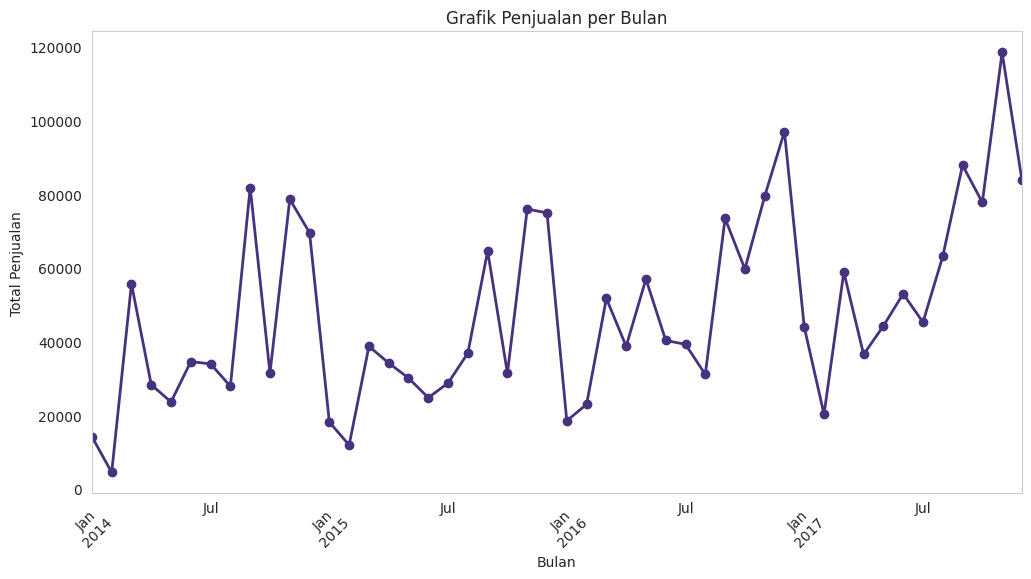

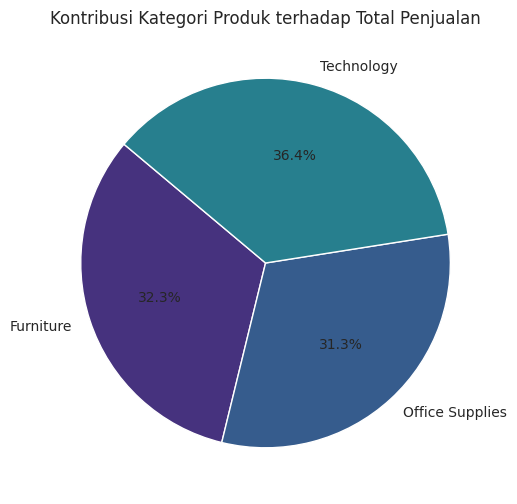

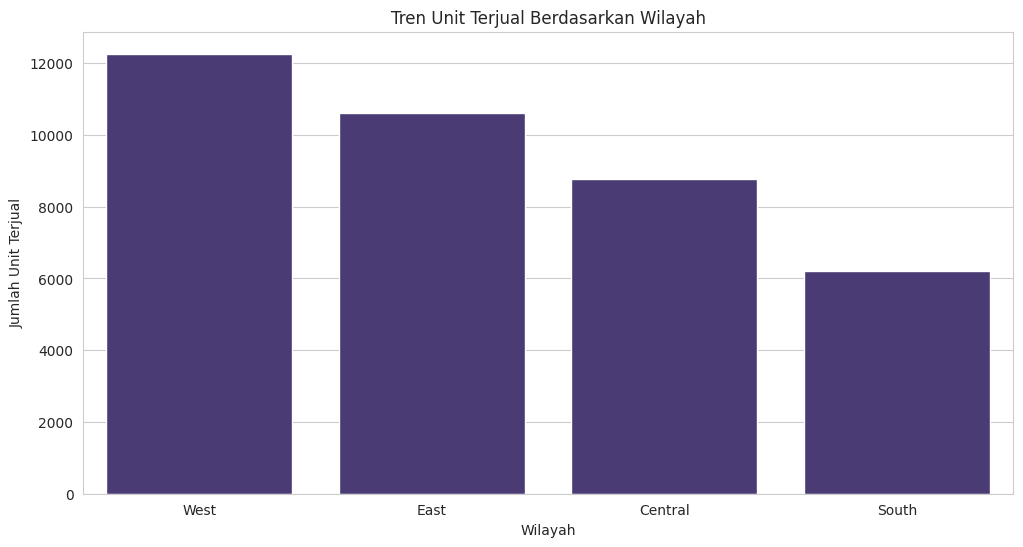

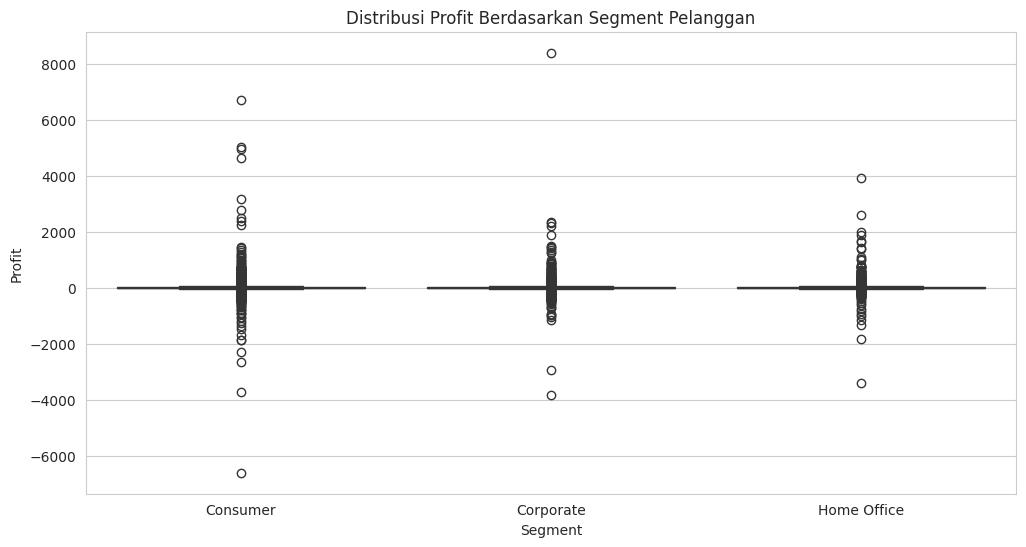

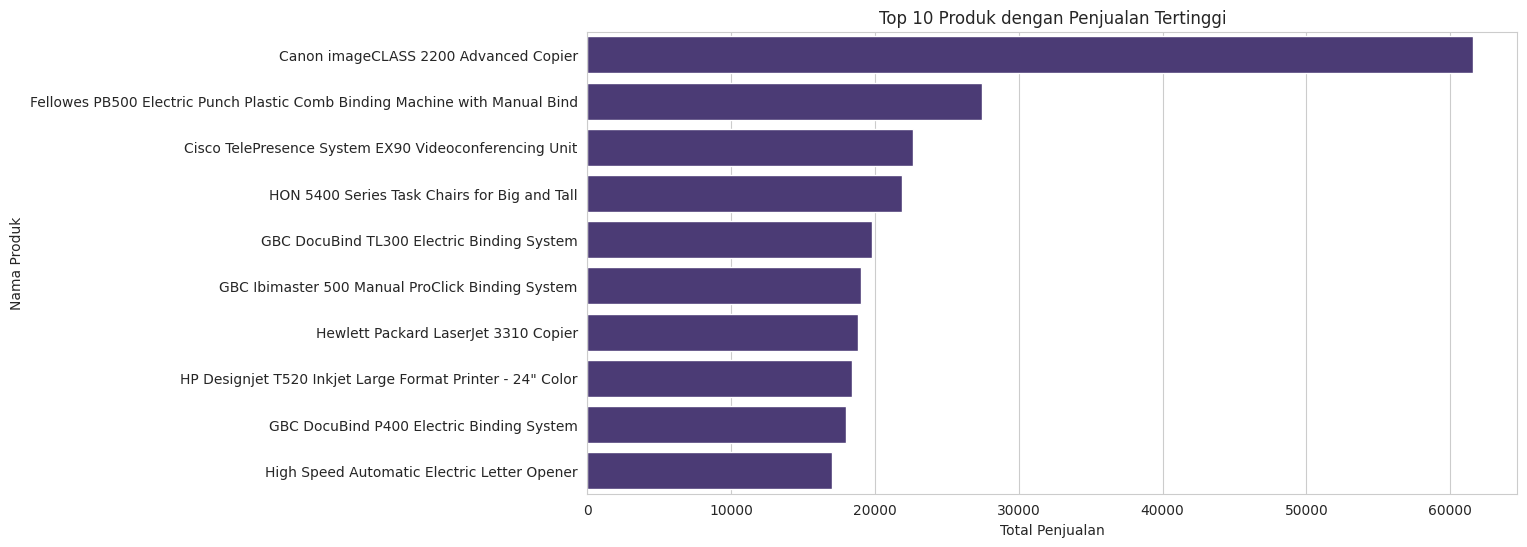

In [29]:
#Jawaban Nomor 1 : Visualisasi Data (Sales Data)
# ========================
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Tambahkan import ini

# ========================
# Konversi kolom ke tipe data yang sesuai
# ========================
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Style visualisasi (konsisten)
sns.set_style("whitegrid")
sns.set_palette("viridis")  # Satu palet warna yang konsisten
plt.rcParams['figure.figsize'] = (12, 6)  # Ukuran default untuk semua grafik

# ========================
# Grafik Penjualan per Bulan
# ========================
df['Month'] = df['Order Date'].dt.to_period('M')  # Tambahkan kolom bulan
monthly_sales = df.groupby('Month')['Sales'].sum()

plt.figure()
monthly_sales.plot(kind='line', marker='o', linewidth=2)
plt.title('Grafik Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# ========================
# Kontribusi Kategori Produk terhadap Total Penjualan
# ========================
plt.figure()
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Kontribusi Kategori Produk terhadap Total Penjualan')
plt.ylabel('')
plt.show()

# ========================
# Tren Unit Terjual Berdasarkan Wilayah
# ========================
plt.figure()
region_quantity = df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)
sns.barplot(x=region_quantity.index, y=region_quantity.values)

plt.title('Tren Unit Terjual Berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.ylabel('Jumlah Unit Terjual')
plt.show()

# ========================
# Distribusi Profit Berdasarkan Segment Pelanggan
# ========================
plt.figure()
sns.boxplot(x='Segment', y='Profit', data=df)

plt.title('Distribusi Profit Berdasarkan Segment Pelanggan')
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

# ========================
# Top 10 Produk dengan Penjualan Tertinggi
# ========================
plt.figure()
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index)

plt.title('Top 10 Produk dengan Penjualan Tertinggi')
plt.xlabel('Total Penjualan')
plt.ylabel('Nama Produk')
plt.show()


In [30]:
#Jawaban Nomor 2 Membuat Dashboard dari Visualisasi Data (Sales Data)

# Sebelum Membuat Dashboard Instalasi Dash dan Plotly
!pip install dash
!pip install dash-bootstrap-components

# Import library tambahan
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# ========================
# Persiapan Data
# ========================
# Konversi kolom 'Order Date' menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df = df.dropna(subset=['Order Date'])  # Hapus baris dengan Order Date kosong

# Konversi kolom numerik
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Tambahkan kolom 'Month' untuk penjualan bulanan
df['Month'] = df['Order Date'].dt.to_period('M').astype(str)

# ========================
# Dashboard menggunakan Dash
# ========================
app = Dash(__name__)  # Menggunakan Dash langsung

# ========================
# Layout Dashboard
# ========================
app.layout = html.Div([
    html.H1("Dashboard Penjualan Data Sales", style={'textAlign': 'center', 'color': '#4A4A4A'}),

    # Grafik Penjualan per Bulan
    html.Div([
        html.H3("Grafik Penjualan per Bulan", style={'color': '#333333'}),
        dcc.Graph(
            id='monthly-sales',
            figure=px.line(
                df.groupby('Month')['Sales'].sum().reset_index(),
                x='Month', y='Sales',
                title='Grafik Penjualan per Bulan',
                markers=True,
                line_shape='spline',
                color_discrete_sequence=['#4E79A7']  # Warna biru netral
            ).update_layout(
                xaxis_title='Bulan',
                yaxis_title='Total Penjualan',
                title_x=0.5
            )
        )
    ]),

    # Kontribusi Kategori Produk
    html.Div([
        html.H3("Kontribusi Kategori Produk terhadap Total Penjualan", style={'color': '#333333'}),
        dcc.Graph(
            id='category-sales',
            figure=px.pie(
                df.groupby('Category')['Sales'].sum().reset_index(),
                names='Category', values='Sales',
                title='Kontribusi Kategori Produk terhadap Total Penjualan',
                color_discrete_sequence=['#4E79A7']  # Warna biru netral
            ).update_layout(title_x=0.5)
        )
    ]),

    # Tren Unit Terjual Berdasarkan Wilayah
    html.Div([
        html.H3("Tren Unit Terjual Berdasarkan Wilayah", style={'color': '#333333'}),
        dcc.Graph(
            id='region-quantity',
            figure=px.bar(
                df.groupby('Region')['Quantity'].sum().reset_index(),
                x='Region', y='Quantity',
                title='Tren Unit Terjual Berdasarkan Wilayah',
                color='Quantity',
                color_continuous_scale=px.colors.sequential.Blues  # Warna biru muda
            ).update_layout(
                xaxis_title='Wilayah',
                yaxis_title='Jumlah Unit Terjual',
                title_x=0.5
            )
        )
    ]),

    # Distribusi Profit Berdasarkan Segment
    html.Div([
        html.H3("Distribusi Profit Berdasarkan Segment Pelanggan", style={'color': '#333333'}),
        dcc.Graph(
            id='segment-profit',
            figure=px.box(
                df, x='Segment', y='Profit',
                title='Distribusi Profit Berdasarkan Segment Pelanggan',
                color='Segment',
                color_discrete_sequence=px.colors.qualitative.Safe
            ).update_layout(
                xaxis_title='Segment Pelanggan',
                yaxis_title='Profit',
                title_x=0.5
            )
        )
    ]),

    # Top 10 Produk dengan Penjualan Tertinggi
    html.Div([
        html.H3("Top 10 Produk dengan Penjualan Tertinggi", style={'color': '#333333'}),
        dcc.Graph(
            id='top-products',
            figure=px.bar(
                df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index(),
                y='Product Name', x='Sales',
                title='Top 10 Produk dengan Penjualan Tertinggi',
                orientation='h',
                color='Sales',
                color_continuous_scale=px.colors.sequential.Plasma
            ).update_layout(
                xaxis_title='Total Penjualan',
                yaxis_title='Nama Produk',
                title_x=0.5
            )
        )
    ])
])

# ========================
# Jalankan Dashboard
# ========================
from google.colab.output import eval_js
from IPython.display import display, Javascript

def show_dash_in_colab(port=8050):
    display(Javascript(f"""
        (async () => {{
            const url = await google.colab.kernel.proxyPort({port});
            window.open(url, '_blank');
        }})();
    """))
    app.run_server(port=port, debug=False)

show_dash_in_colab()


<ipython-input-30-02c4d1b888a8>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-02c4d1b888a8>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-02c4d1b888a8>:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-02c4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>